<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6

A Jupyter notebook with code examples in R for _Chapter 6_ of _Routledge_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates Data Diagnostics and Summaries.

File `Chapter6.ipynb` | Version `11/9/2022` | [Back to Index](https://github.com/tuomaseerola/emr)

---

## Preliminaries
Load or install the necessary R packages.

In [1]:
library(tidyverse,quiet=TRUE)
library(ggplot2,quiet=TRUE)
install.packages("cowplot",quiet=TRUE)
library(cowplot,quiet=TRUE)
options(repr.plot.width = 6, repr.plot.height = 4) # Default plot size for Colab
options(digits=2)
R.version.string

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "R version 4.2.0 (2022-04-22)"

In [2]:
if (!require(devtools)) install.packages("devtools",quiet=TRUE)
devtools::install_github("tuomaseerola/MusicScienceData@main",quiet=TRUE)
library(MusicScienceData,quiet=TRUE)

Loading required package: devtools

Loading required package: usethis



## Code 6.1

In [3]:
# Code 6.1
print(MusicScienceData::sadness[1:4,1:7])

# A tibble: 4 × 7
  subj  age      gender listen  expert listensad  ASM1
  <fct> <fct>    <fct>  <fct>   <chr>  <fct>     <int>
1 1     35 to 44 Female d       MusicL Sometimes     6
2 2     45 to 54 Female mult./d MusicL Often         2
3 3     18 to 24 Female d       NM     Sometimes     6
4 4     25 to 34 Male   d       Amat.  Sometimes     5


## Code 6.2

In [4]:
# Code 6.2
print(MusicScienceData::priming[1:3,1:6])

# A tibble: 3 × 6
  Participant Prime_V  Target_V    RT Correct   Age
  <fct>       <fct>    <fct>    <int> <fct>   <int>
1 1           Positive Negative   444 Correct    24
2 1           Positive Negative   437 Correct    24
3 1           Negative Negative   453 Correct    24


## Code 6.3
Figure 6.1. A histogram showing the distribution of responses to a particular question (no. 25) in Attitudes towards Sad Music (ASM) instrument.

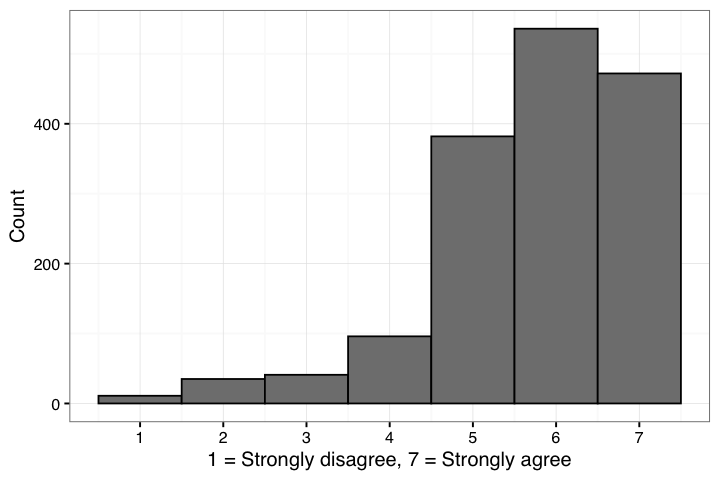

In [5]:
# Code 6.3
sadness <- MusicScienceData::sadness
g1 <- sadness %>%
  drop_na(ASM25) %>%   # drop missing values
  ggplot(aes(x = ASM25))+
  geom_histogram(bins=7,fill="grey50", colour='black')+
  scale_x_continuous(breaks = seq(1,7,by=1))+
  ylab('Count')+
  xlab('1 = Strongly disagree, 7 = Strongly agree')+
  theme_MusicScience()
g1


## Code 6.5
Figure 6.4. A box plot showing the distribution of responses to a particular question (no. 23) in Attitudes towards Sad Music (ASM) instrument split across gender.

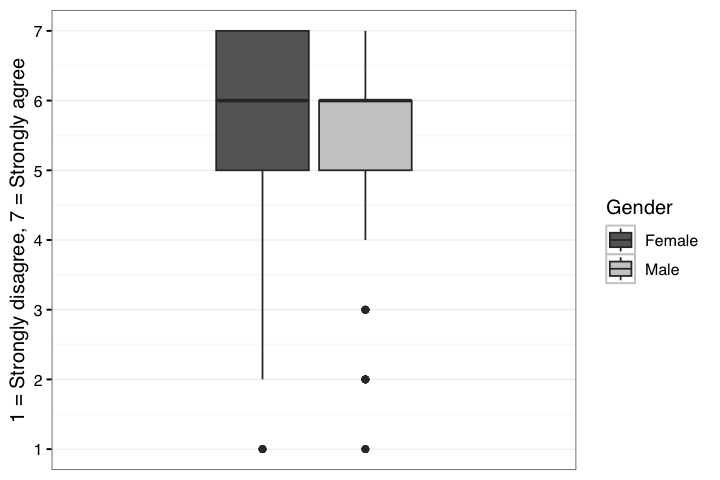

In [6]:
# Code 6.5
g5 <- sadness %>%
  drop_na(ASM25) %>%   # drop missing values
  ggplot(aes(y = ASM25,fill=gender))+
  geom_boxplot()+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  scale_fill_grey(start = .4,end = .8,name='Gender')+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  theme_MusicScience()
print(g5)


## Code 6.6
Figure 6.5. Alternative visualisations of data. A: density plot across gender, B: multiple boxplots, C: boxplot overlaid with original data, D: violin plot with mean and median overlaid.

In [7]:
# Code 6.6
d<-MusicScienceData::priming

g1<-ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=100,colour='grey50',fill='white')+
  ggtitle('Bin width 100')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()


g2<-ggplot(d,aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(0,2000,by=400))+
  theme_MusicScience()

g3<-ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  ggtitle('Bin width 10 with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200),limits = c(0,2000))+
  geom_vline(xintercept = c(200,1500),linetype='dashed')+
  theme_MusicScience()


g4<-ggplot(dplyr::filter(d,RT>200 & RT<1500),aes(x=RT))+
  geom_histogram(binwidth=10,colour='grey50',fill='white')+
  geom_density(aes(y=10 * ..count..),alpha=0.5,colour='black',fill=NA)+
  ggtitle('Bin width 10 density with trimming')+
  ylab('Count')+
  xlab('Reaction time (ms)')+
  scale_x_continuous(breaks=seq(200,1500,by=200))+
  theme_MusicScience()

G <- plot_grid(g1, g2, g3, g4, nrow = 2)

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


## Code 6.7
Table 6.1: The means of the ASM question 20 across the age.

In [8]:
# Code 6.7
table1 <- MusicScienceData::sadness %>%
        drop_na(ASM20) %>%   # drop missing values
        group_by(age) %>%
        summarise(n=n(),mean_cl_normal(ASM20))
colnames(table1) <- c('Age','N','M','95% CI LL','95% CI UL')
knitr::kable(table1,digits = 2, format='simple',
             caption = 'The means of the ASM question 20 across the age.')



Table: The means of the ASM question 20 across the age.

Age           N     M   95% CI LL   95% CI UL
---------  ----  ----  ----------  ----------
18 to 24    355   4.5         4.4         4.6
25 to 34    497   4.6         4.5         4.8
35 to 44    329   4.7         4.6         4.9
45 to 54    213   4.8         4.5         5.0
55 to 64    136   5.0         4.8         5.2
65 to 74     40   4.9         4.5         5.3

## Code 6.8

In [9]:
mean(MusicScienceData::sadness$ASM20, na.rm=TRUE) # Mean (ignore missing values)
sd(MusicScienceData::sadness$ASM20,na.rm=TRUE)


[1] 4.7

[1] 1.3

## Code 6.9
Figure 6.6. A bar graph showing the means of the responses to the question no. 20 in Attitudes towards Sad Music (ASM) instrument across gender.

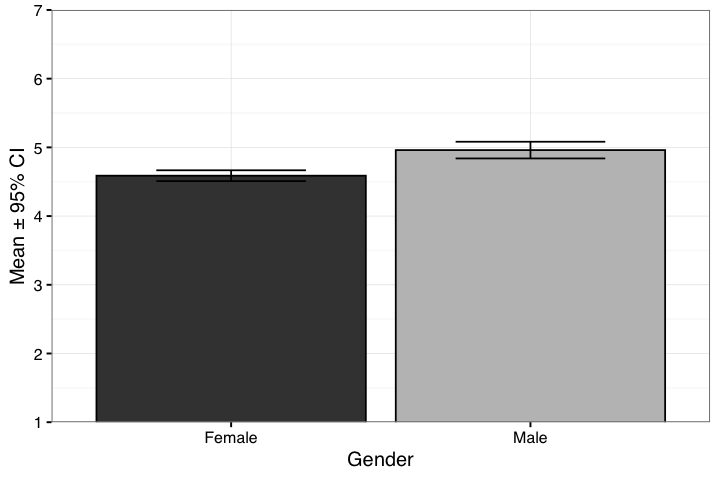

In [10]:
# Code 6.9
g6 <- sadness %>%
  drop_na(ASM20) %>%   # drop missing values
  group_by(gender) %>%
  summarise(mean= mean(ASM20),ci = mean_cl_normal(ASM20)) %>%
  ggplot(aes(x = gender,y = mean,fill=gender))+
  geom_col(colour='black',show.legend = FALSE)+
  geom_errorbar(aes(ymin=ci$ymin,ymax=ci$ymax),width=0.5)+
  scale_y_continuous(breaks = seq(1,7,by=1), expand = c(0,0))+
  scale_fill_grey(start=.25,end=.75)+
  coord_cartesian(ylim = c(1, 7)) +
  ylab('Mean ± 95% CI')+
  xlab('Gender')+
  theme_MusicScience()
print(g6)


## Code 6.10
Figure 6.7. A bar graph showing the means of the responses to the question no. 6 in Attitudes towards Sad Music (ASM) instrument across musical expertise.

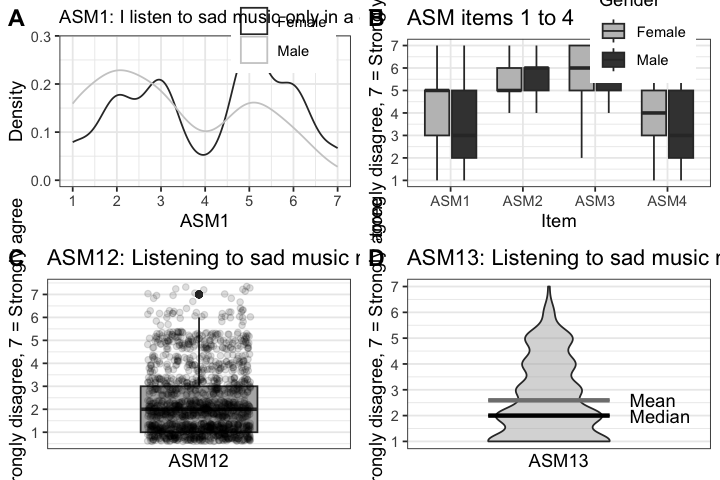

In [11]:
# Code 6.10

g1 <- MusicScienceData::sadness %>%
  drop_na(ASM1) %>%   # drop missing values
  ggplot(aes(x= ASM1,color=gender))+
  geom_density(adjust=1.25)+
  scale_color_grey(name='Gender')+
  scale_x_continuous(breaks = seq(1,7,by=1))+
  ggtitle(sadness_ASM_labels[1])+
  ylab('Density')+
  theme_bw()+
  theme(legend.justification=c(1,0), legend.position=c(0.95,0.75))+
  theme(plot.title = element_text(size=11))

tmp<-as_tibble(MusicScienceData::sadness)
tmp2<-tmp[,c(3,7:10)]
dfl <- pivot_longer(tmp2,cols = c(2:5))

g2 <- dfl %>%
  drop_na(value) %>%   # drop missing values
  ggplot(aes(x=name,y = value,fill=gender))+
  geom_boxplot(outlier.shape ="")+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  scale_fill_grey(start = .75, end=.25, name="Gender")+
  ggtitle('ASM items 1 to 4')+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('Item')+
  theme_bw()+
  theme(legend.justification=c(1,0), legend.position=c(0.95,0.70))

g3 <- MusicScienceData::sadness %>%
  drop_na(ASM12) %>%   # drop missing values
  ggplot(aes(x=1,y = ASM12))+
  geom_boxplot(fill='gray70')+
  geom_jitter(alpha=0.13,colour='black', width = 0.33)+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  ggtitle(sadness_ASM_labels[12])+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('ASM12')+
  theme_bw()

g4 <- MusicScienceData::sadness %>%
  drop_na(ASM13) %>%   # drop missing values
  ggplot(aes(x=1,y = ASM13))+
  geom_violin(fill='grey70',adjust=1.2,alpha=0.50)+
  scale_y_continuous(breaks = seq(1,7,by=1))+
  scale_x_discrete()+
  stat_summary(fun = median, fun.min = median, fun.max = median,
               geom = "crossbar", width = 0.9)+
  stat_summary(fun = mean, fun.min = mean, fun.max = mean,
               geom = "crossbar", width = 0.9,colour='gray50')+
  ggtitle(sadness_ASM_labels[13])+
  annotate("text",x=1.6,y=mean(MusicScienceData::sadness$ASM13,na.rm = TRUE),label='Mean',hjust=0)+
  annotate("text",x=1.6,y=median(MusicScienceData::sadness$ASM13,na.rm = TRUE),label='Median',hjust=0)+
  ylab('1 = Strongly disagree, 7 = Strongly agree')+
  xlab('ASM13')+
  theme_bw()

G1 <- plot_grid(g1,g2,g3,g4,labels = c("A", "B", "C", "D"),ncol = 2, nrow = 2)
G1


## Code 6.11
Figure 6.8. A scatterplot showing the means of the ratings to 110 film soundtrack excerpts using scales tension and valence in Eerola and Vuoskoski (2011).

Warning message:
“The following aesthetics were dropped during statistical transformation: label
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 5 rows containing missing values (`geom_smooth()`).”


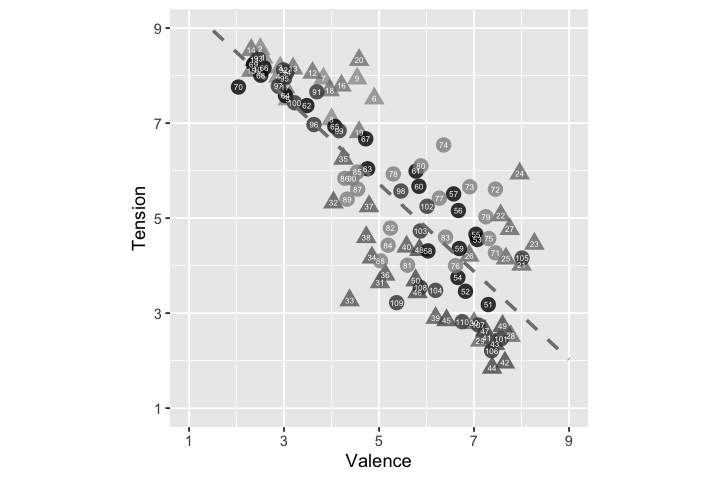

In [12]:
# Code 6.11
g9 <- ggplot(soundtrack) +
  aes(x = Valence, y = Tension, colour = TARGET_EMOTION,
      label=Number,
      shape= TARGET_FRAMEWORK) +
  geom_point(size=4,alpha=0.80,show.legend=FALSE) +
  coord_fixed(ratio = 1)+
  geom_smooth(aes(shape = NULL,colour=NULL),method="lm",
              formula='y ~x',se=FALSE, fullrange=TRUE,
              level=0.95, colour='grey50', # adds trendline
              linetype='dashed',show.legend = FALSE)+
  geom_text(show.legend=FALSE,color='white',size=1.7)+ # labels
  scale_colour_grey(name='Emotion',start = .6,end = 0)+
  scale_shape(name='Framework')+
  scale_x_continuous(breaks=seq(1,9,by=2),limits=c(1,9))+
  scale_y_continuous(breaks=seq(1,9,by=2),limits=c(1,9))
print(g9)


## References

- Eerola, T., & Peltola, H.-R. (2016). Memorable experiences with sad music - reasons, reactions and mechanisms of three types of experiences. _PloS ONE, 11(6)_, e0157444. <https://doi.org/http://dx.doi.org/10.1371/journal.pone.0157444>

- Eerola, T., & Vuoskoski, J. K. (2011). A comparison of the discrete and dimensional models of emotion in music. _Psychology of Music, 39(1)_, 18–49.